# Group 7 Project: Latent Space Cluster Analysis
<i>Patrick Kay, Kyle Shannon, Ean Vandergraaf</i>

<b>Suggested Activities for Analysis:</b>
* Get a feel for the data by looking at specific frames and the closest other points.
* Clean your data, perhaps moving the beginning and end content of credits.
* Develop hunches and hypotheses about different characters, visual themes, etc.
* Watch or rewatch the movie and/or scour the internet for critical analysis to develop theories.
* Use clustering techniques, such as k-means, to break up scenes or themes
* Develop algorithms or methods for breaking things down scene by scene.
* Consider aggregating scenes as averages.
* Reduce the number of dimensions to explore relationships among.
* Plot timelines that have additional analysis or selective content.
* Interpret the data and analysis through group discussions.

  
<b>Goal to answering these questions:</b>
* <b>Questions about characters</b>: Who are the main characters? When are they featured or absent?
* <b>Semantic themes and motifs</b>: Are there broader themes you can find that repeat across scenes?
* <b>Outliers</b>: Are there scenes that differ greatly compared to most of the rest of the film?
* <b>Clusters</b>: How would you characterize the visual content of the film? Answering this question will likely require both clustering (e.g., k-means, t-SNE) and using your own interpretation on the results of the clustering to make sense of it.
cussions. 
it.

## TODO: Organize the Data

### 1. Take out opening credits

In [13]:
import re
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

import json
moive_embeddings = json.load(open("honey_i_shrunk_the_kids_movie_embeddings_1_second.json"))

embeddings = np.array([vector['embedding'] for vector in moive_embeddings[163:5386]])
print(len(embeddings))
#print(embeddings[0])

5223


### 2. Make clusters along chunks of the timeline

In [14]:
No_chunks = 5
chunk_embeddings = np.array_split(embeddings, No_chunks)

print(chunk_embeddings)

[array([[ 5.37705719e-01,  7.36874521e-01,  7.08179250e-02, ...,
        -3.14219892e-01, -2.64640152e-01,  5.39753318e-01],
       [ 5.58191061e-01,  7.64112175e-01,  1.47231817e-01, ...,
        -3.20014238e-01, -2.53475249e-01,  5.68730474e-01],
       [ 5.23132086e-01,  7.68910587e-01,  6.61231428e-02, ...,
        -1.87447101e-01, -2.44298980e-01,  5.84310412e-01],
       ...,
       [ 6.46631122e-01, -2.35018358e-02, -4.23672199e-02, ...,
        -1.37088835e+00,  1.15125924e-02, -4.86008823e-04],
       [ 7.94122815e-01, -1.32157281e-02,  3.64214540e-01, ...,
        -1.21953809e+00,  1.18878312e-01, -1.91903502e-01],
       [ 4.49674606e-01,  5.52664697e-02,  1.07860804e-01, ...,
        -5.09606823e-02, -3.37897956e-01, -2.30781898e-01]]), array([[ 6.49683535e-01, -1.88620567e-01,  3.06395710e-01, ...,
        -2.69825995e-01, -7.55741596e-01, -9.56634432e-02],
       [ 6.79578066e-01, -1.68799460e-02,  3.10022712e-01, ...,
        -1.72907531e-01, -6.48618460e-01, -4.80689108

### 3. Analyze themes within the clusters

### 4. Try to find ideal numbers of clusters

1.K-Means Clustering



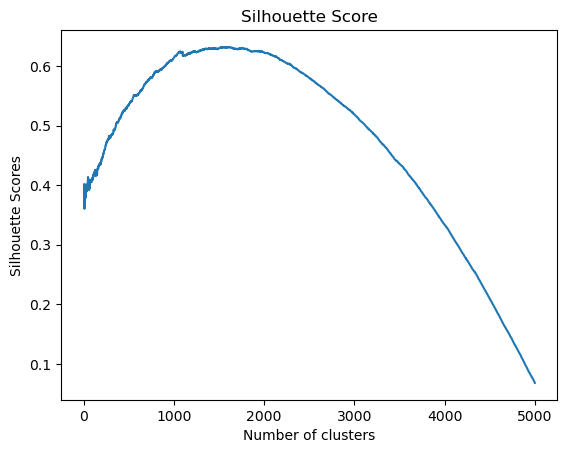

1609
0.631942


In [8]:
tsne = TSNE(n_components=2, random_state=42)
embedded_vectors = tsne.fit_transform(embeddings)

print("1.K-Means Clustering\n")
sil_score=[]
maxInd = 0
for i in range(2,5000):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto').fit(embedded_vectors)
    kmeans_labels = kmeans.labels_
    
    sil_score.append(silhouette_score(embedded_vectors, kmeans_labels, metric = 'euclidean'))
    if i !=2:
        if sil_score[i-2] >= sil_score[maxInd]:
            maxInd = i-2
    

plt.plot(range(2,5000),sil_score)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Scores')
plt.show()

print(maxInd)
print(sil_score[maxInd])

Sil Score for 0


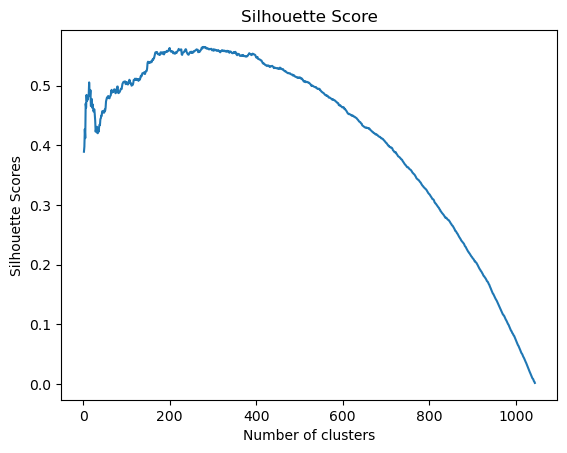

277
0.5646969
Sil Score for 1


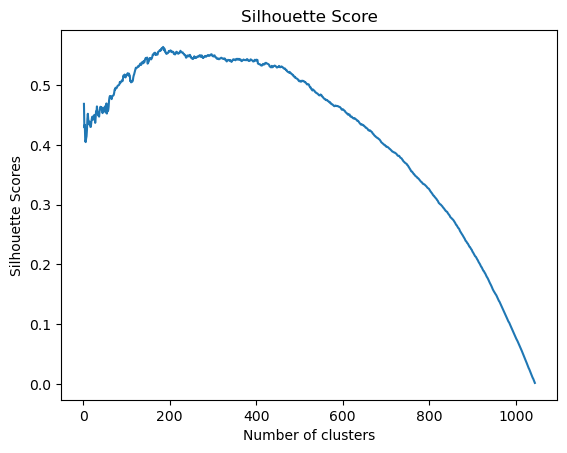

183
0.5636763
Sil Score for 2


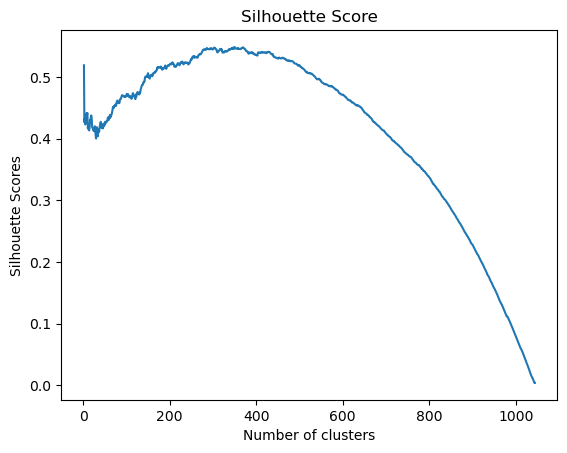

348
0.5484584
Sil Score for 3


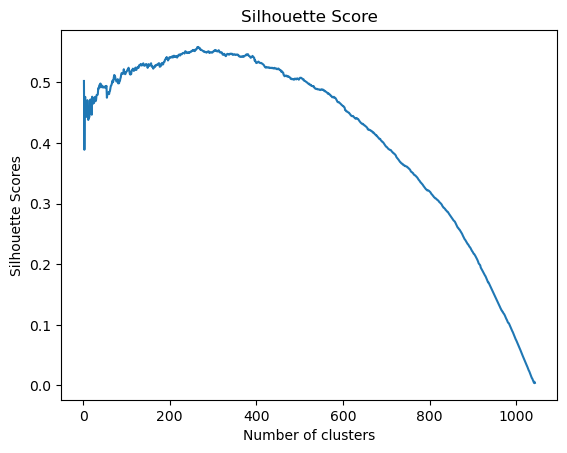

264
0.55856127
Sil Score for 4


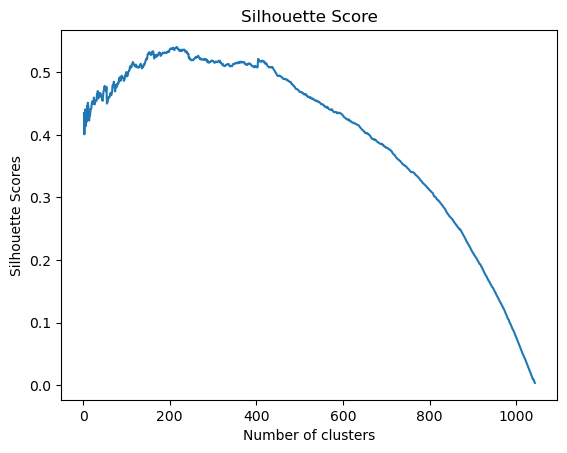

214
0.540805


In [15]:
tsne = TSNE(n_components=2, random_state=42)
warnings.filterwarnings('ignore')

for k in range(0, No_chunks):
    chunk_vectors = tsne.fit_transform(chunk_embeddings[k])

    print("Sil Score for "+str(k))
    sil_score=[]
    maxInd = 0
    for i in range(2,len(chunk_embeddings[k])):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto').fit(chunk_vectors)
        kmeans_labels = kmeans.labels_

        sil_score.append(silhouette_score(chunk_vectors, kmeans_labels, metric = 'euclidean'))
        if i !=2:
            if sil_score[i-2] >= sil_score[maxInd]:
                maxInd = i-2


    plt.plot(range(2,len(chunk_embeddings[k])),sil_score)
    plt.title('Silhouette Score')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.show()

    print(maxInd)
    print(sil_score[maxInd])

# Film Description
<i>This section should cite and briefly describe the film.</i>

# Methods Summary
<i>This section should highlight methods you used in your exploratory analysis. You should include at least one clustering technique or develop another way to relate frames to other frames. you should also consider dimensionality reduction. 

# Hunches and Hypotheses
<i>This section should summarize the question that you asked about teh film taht could potentially be answered by exploratory analysis. You should ask at least three questions.</i>

<u>Q1. Do most of the clusters have something to do with the kids?</u>

<u>Q2. That machines/tech is fairly common in the clusters?</u>

<u> Q3. One character appears more than any other</u>

# Results and Interpretations

<i>This section should include a summary of your findings. Describe the extent and results of your goal in answering questions.</i>

# Reflection
<i>Reflect on your process of analysis. What worked well and did not work well? Describe the limitations of the work and describe what you would work on with more time.</i>